In [3]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [4]:
load_data = pd.read_excel("/content/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [5]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [6]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fae82a9c5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fae82a34550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae82a483d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fae82a488d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fae82a314d0>,
  <matplotlib.lines.Line2D at 0x7fae82a31c90>]}

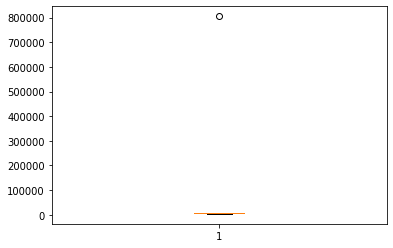

In [7]:
plt.boxplot(load_data.iloc[:,0])

In [8]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [9]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fae8249d810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fae824a3850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae824aa890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fae824aa350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fae8249dd90>,
  <matplotlib.lines.Line2D at 0x7fae824a3310>]}

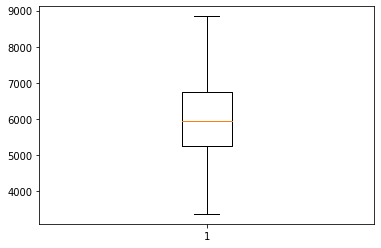

In [10]:
plt.boxplot(load_data.iloc[:,0])

In [11]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

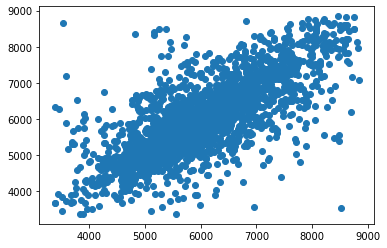

In [12]:
plt.scatter(x,y)

In [13]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)

In [14]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [15]:
x = minmax_scale(x)
y = minmax_scale(y)

In [17]:
data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [19]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c,v_m,v_c,momentum_coeff)
    deltac = -1*learning_rate*gradc(d,m,c,v_m,v_c,momentum_coeff)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.49166921845823397
epoch 0, batch 1, error 0.47443418182669433
epoch 0, batch 2, error 0.4459043909583128
epoch 0, batch 3, error 0.4167461093188666
epoch 1, batch 0, error 0.364274398866887
epoch 1, batch 1, error 0.32644401360438213
epoch 1, batch 2, error 0.2766354565883863
epoch 1, batch 3, error 0.2415184884432721
epoch 2, batch 0, error 0.20512862366082307
epoch 2, batch 1, error 0.16062046173936625
epoch 2, batch 2, error 0.12928309500442145
epoch 2, batch 3, error 0.09857168740223737
epoch 3, batch 0, error 0.07867701448659073
epoch 3, batch 1, error 0.056732114778259145
epoch 3, batch 2, error 0.04451428797497584
epoch 3, batch 3, error 0.027376063207932455
epoch 4, batch 0, error 0.02039715045867199
epoch 4, batch 1, error 0.01607569921235072
epoch 4, batch 2, error 0.010071323902104542
epoch 4, batch 3, error 0.010691239869680076
epoch 5, batch 0, error 0.009215353018665813
epoch 5, batch 1, error 0.010340003489210773
epoch 5, batch 2, error 0.010143

Text(0.5, 1.0, 'error graph')

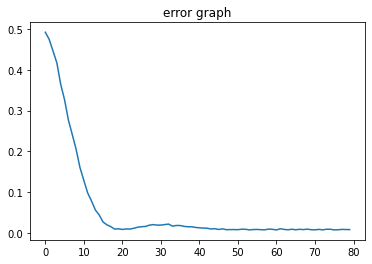

In [20]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [21]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.00885666572412213
test error : 0.008769809974383216


In [22]:
print(m,c)

0.6291661841283727 0.1846570007066917


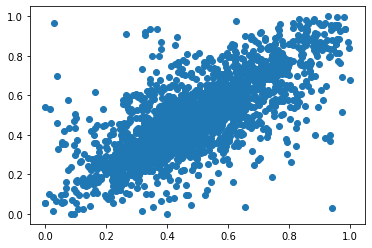

In [23]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

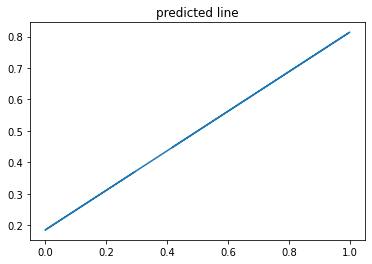

In [24]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

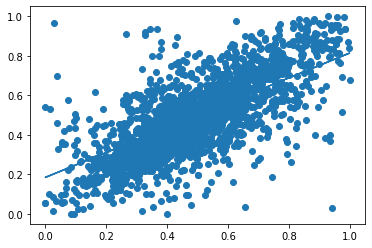

In [25]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [26]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4485
predicted load for this hour is :  5083.376816243659
